In [1]:
import pandas as pd
import sys
import os
from scipy import stats

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath('../scripts'))


In [2]:
data = pd.read_csv(r"../data/MachineLearningRating_v3.txt", sep="|")
data.to_csv(r"../data/MachineLearningRating_v3.csv", index=False)

C:\Users\Naim\AppData\Local\Temp\ipykernel_15124\3819027251.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"../data/MachineLearningRating_v3.txt", sep="|")


In [3]:
data_structure = data.dtypes


In [4]:
# Descriptive Statistics: Variability for numerical features such as TotalPremium, TotalClaims, etc.

descriptive_stats = data[['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']].describe()


In [5]:
# Display results
data_structure, descriptive_stats

(UnderwrittenCoverID           int64
 PolicyID                      int64
 TransactionMonth             object
 IsVATRegistered                bool
 Citizenship                  object
 LegalType                    object
 Title                        object
 Language                     object
 Bank                         object
 AccountType                  object
 MaritalStatus                object
 Gender                       object
 Country                      object
 Province                     object
 PostalCode                    int64
 MainCrestaZone               object
 SubCrestaZone                object
 ItemType                     object
 mmcode                      float64
 VehicleType                  object
 RegistrationYear              int64
 make                         object
 Model                        object
 Cylinders                   float64
 cubiccapacity               float64
 kilowatts                   float64
 bodytype                     object
 

In [6]:

# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [7]:

from insurance_analysis import handle_missing_values

# Call the function to handle missing values
cleaned_data = handle_missing_values(data)

# Verify if missing values have been handled
print(cleaned_data.isnull().sum())


c:\Users\Naim\Insurance-comp-anlysis\scripts\insurance_analysis.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], errors='coerce')  # Convert to datetime


UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
CustomValueEstimate         0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
NewVehicle

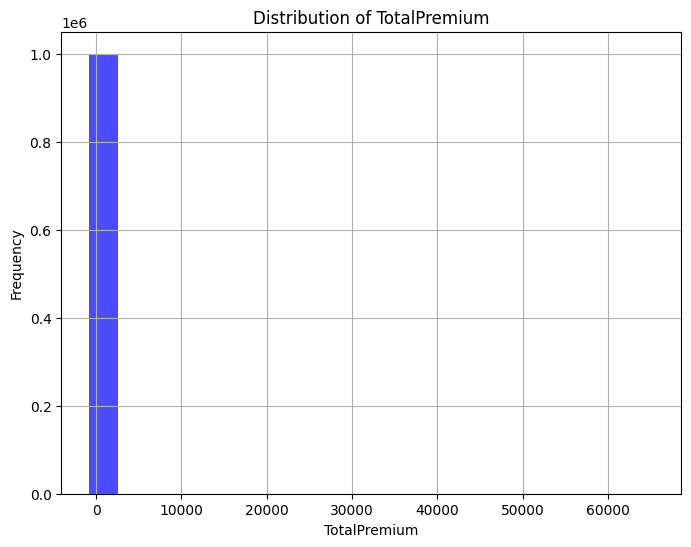

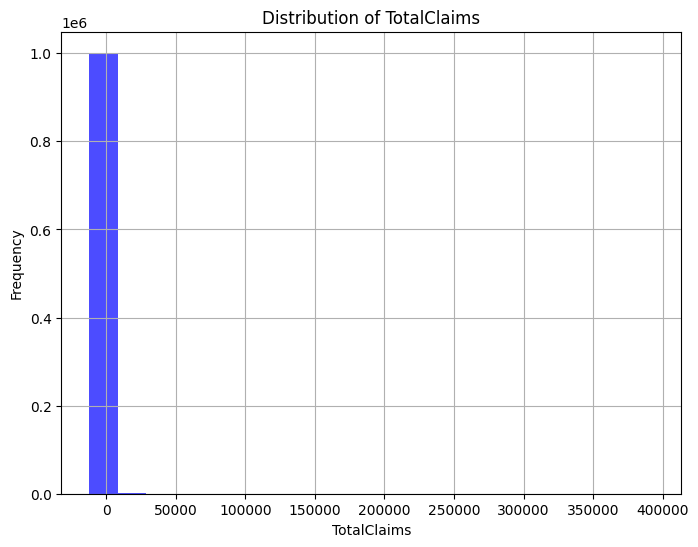

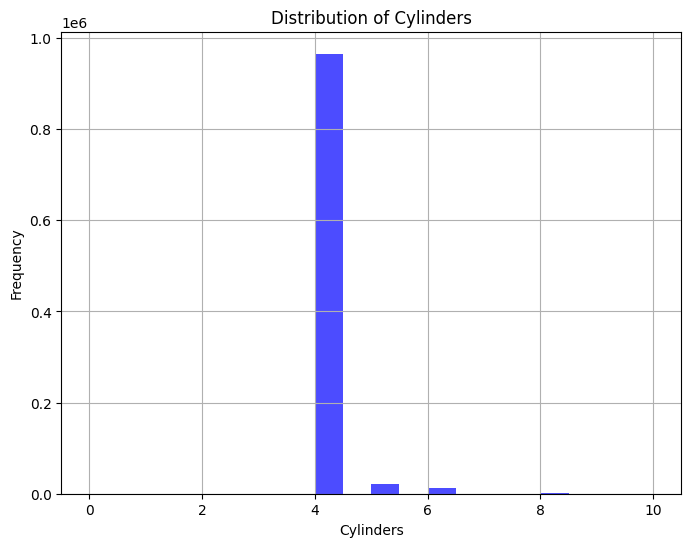

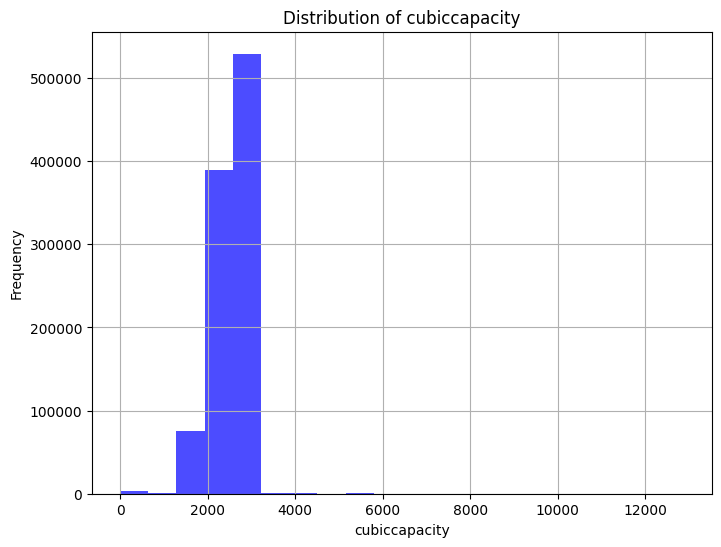

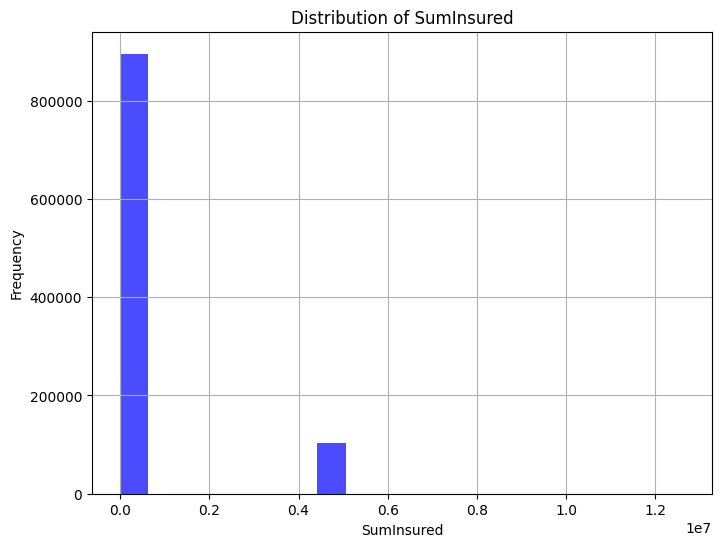

In [8]:

from insurance_analysis import plot_numerical_histograms

# Define numerical columns
numerical_columns = ['TotalPremium', 'TotalClaims', 'Cylinders', 'cubiccapacity', 'SumInsured']

# Call the function to plot histograms for numerical columns
plot_numerical_histograms(cleaned_data, numerical_columns)


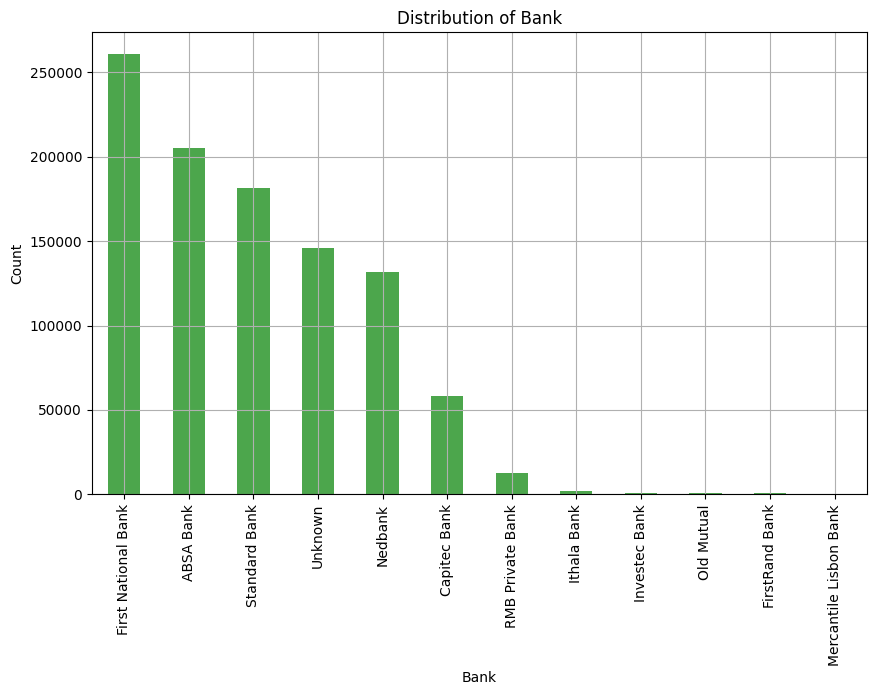

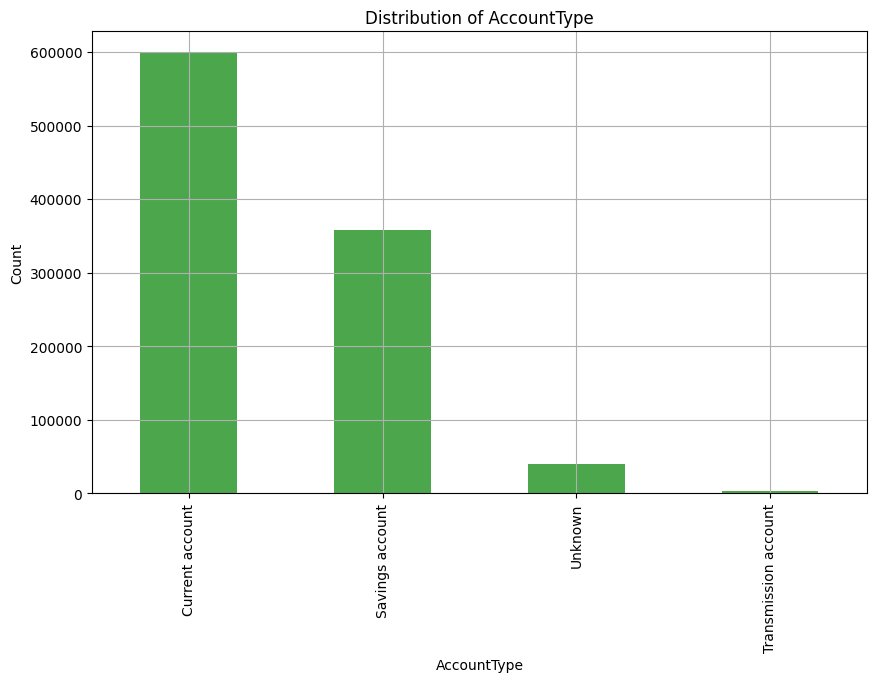

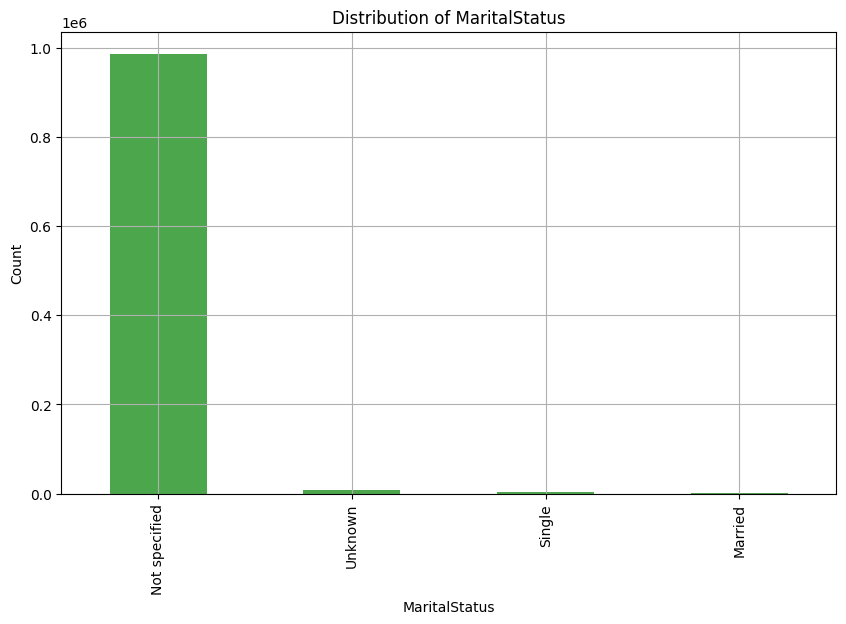

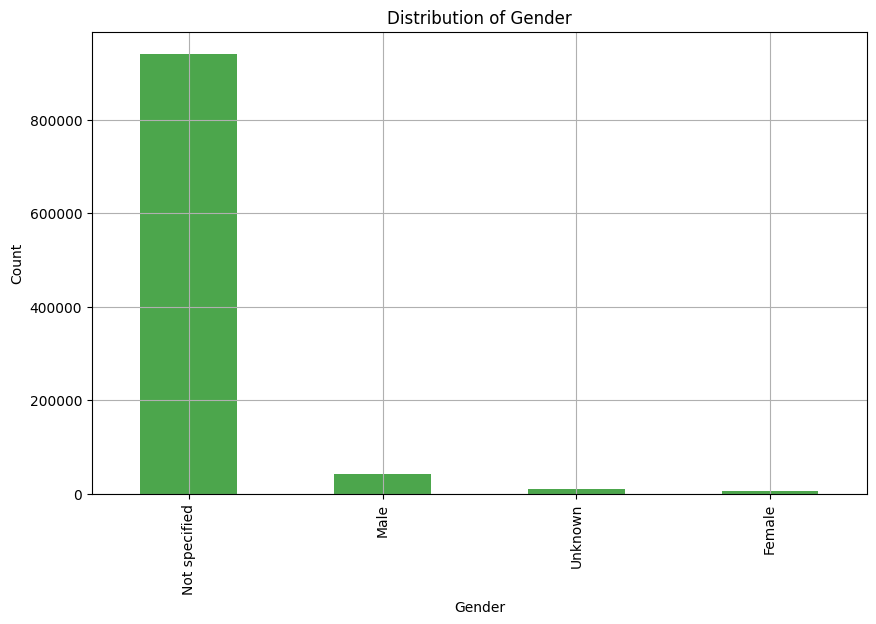

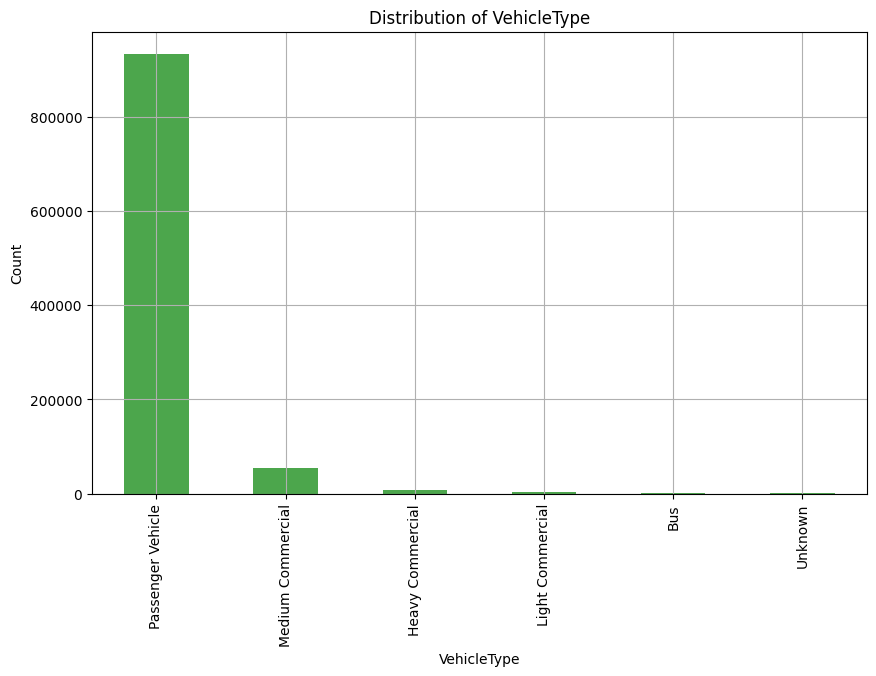

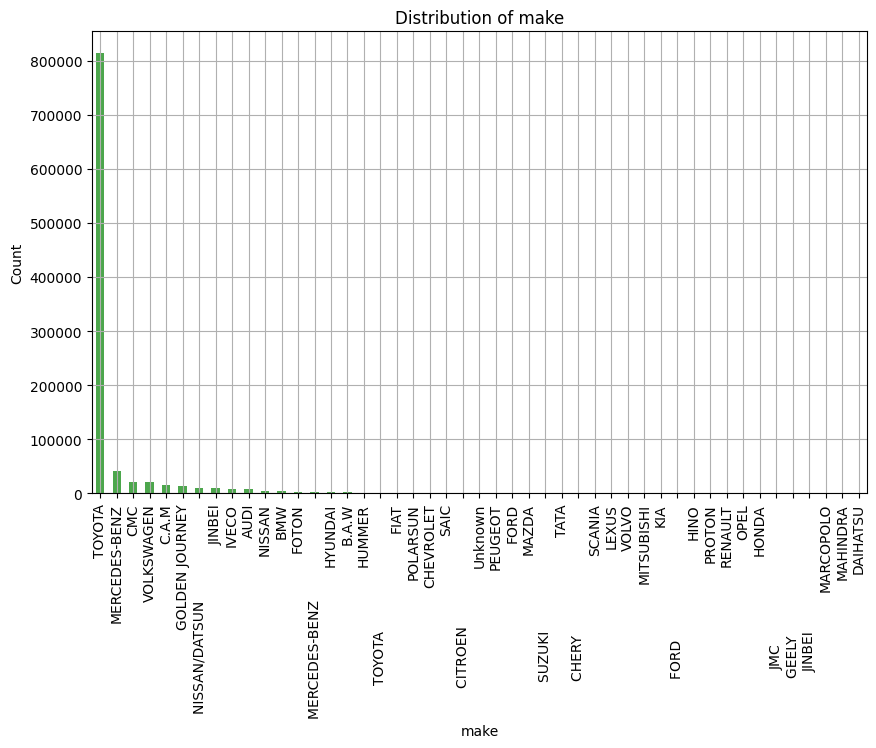

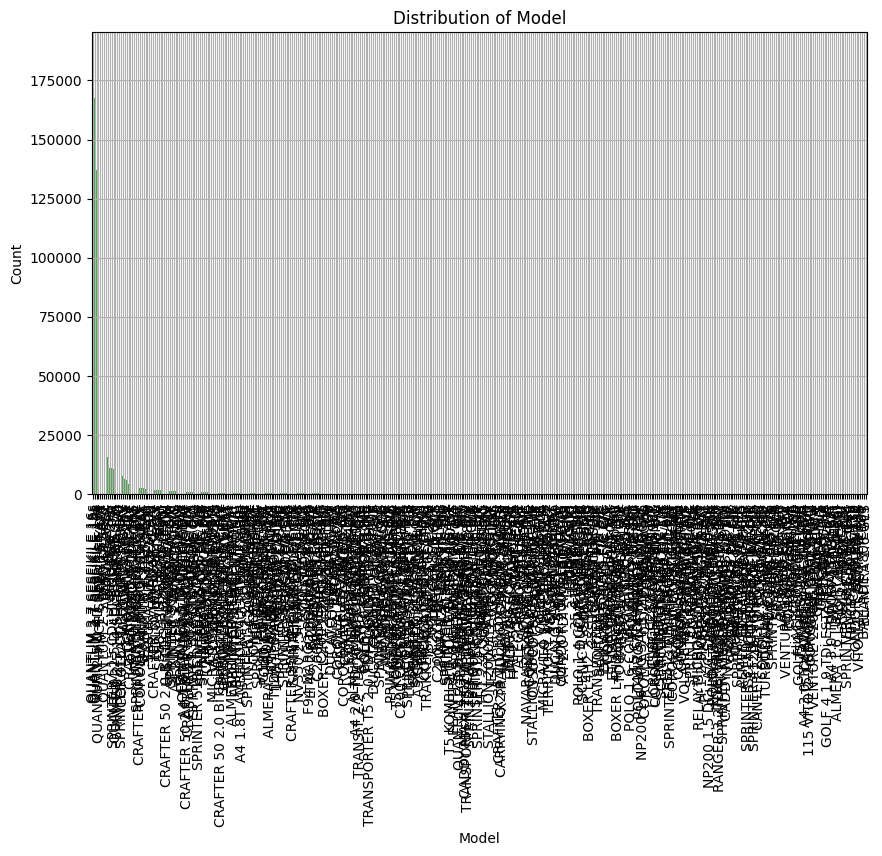

In [9]:
from insurance_analysis import plot_categorical_bars

# Define categorical columns
categorical_columns = ['Bank', 'AccountType', 'MaritalStatus', 'Gender', 'VehicleType', 'make', 'Model']

# Call the function to plot bar charts for categorical columns
plot_categorical_bars(cleaned_data, categorical_columns)


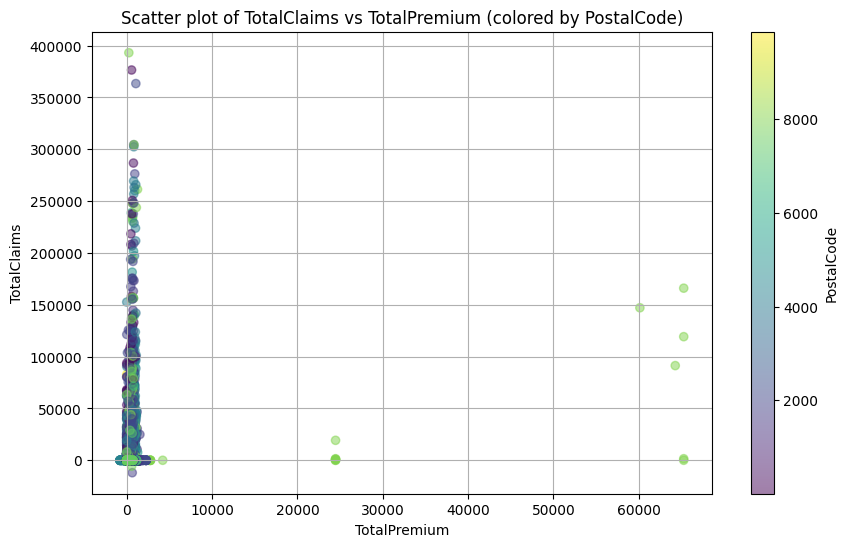

In [10]:

from insurance_analysis import plot_scatter_plots
# Call the function to plot scatter plot between TotalPremium and TotalClaims as a function of PostalCode
plot_scatter_plots(cleaned_data, 'TotalPremium', 'TotalClaims', 'PostalCode')


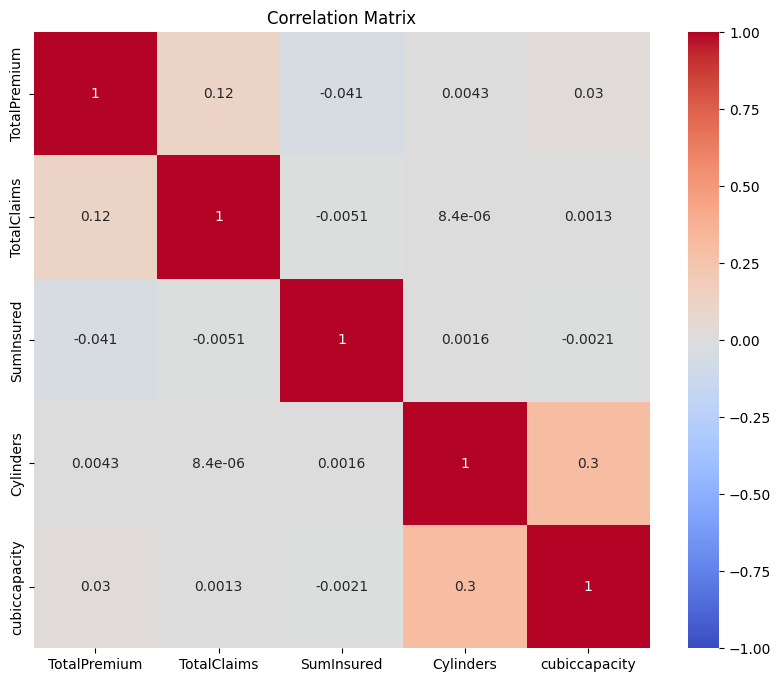

In [11]:
from insurance_analysis import plot_correlation_matrix

# Define numerical columns of interest
numerical_columns = ['TotalPremium', 'TotalClaims', 'SumInsured', 'Cylinders', 'cubiccapacity']

# Call the function to plot correlation matrix
plot_correlation_matrix(cleaned_data, numerical_columns)


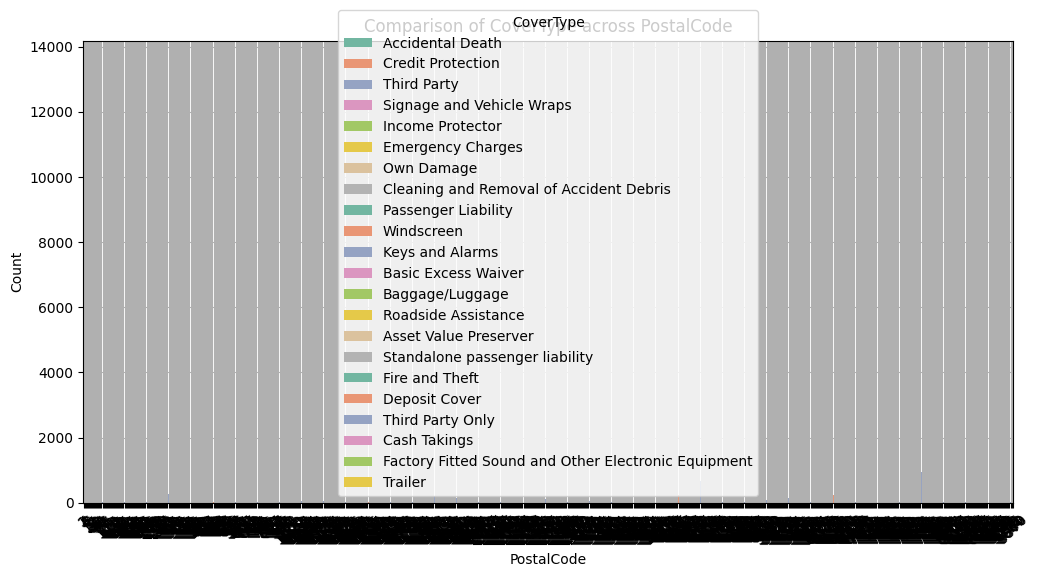

In [12]:
from insurance_analysis import plot_cover_type_trends

# Compare insurance cover type across PostalCode
plot_cover_type_trends(cleaned_data, 'PostalCode', 'CoverType')

c:\Users\Naim\Insurance-comp-anlysis\scripts\insurance_analysis.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=geo_col, y=premium_col, data=df, palette='Set1')


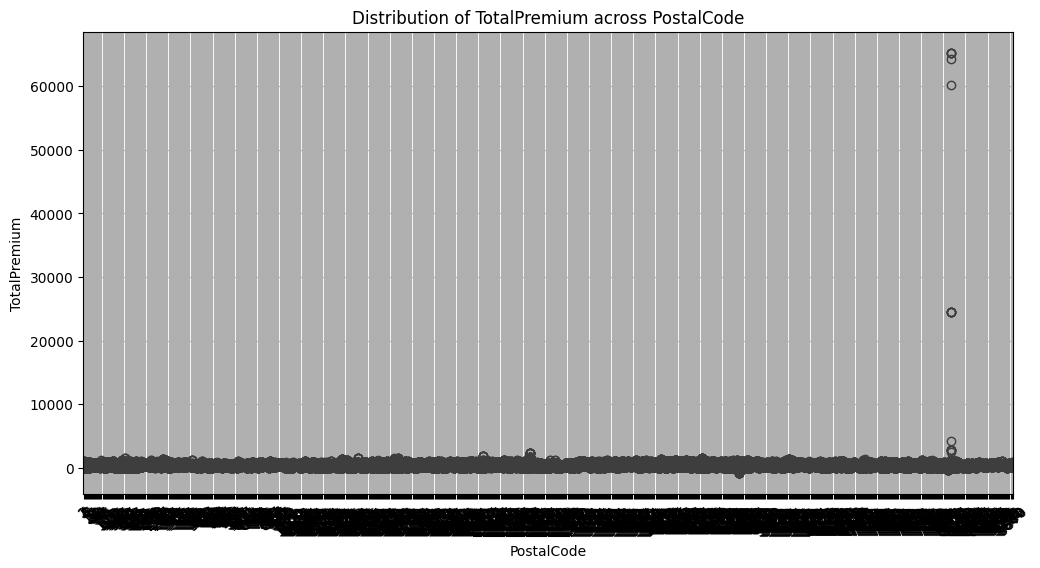

In [13]:
from insurance_analysis import plot_premium_trends

# Compare premium trends across PostalCode
plot_premium_trends(cleaned_data, 'PostalCode', 'TotalPremium')


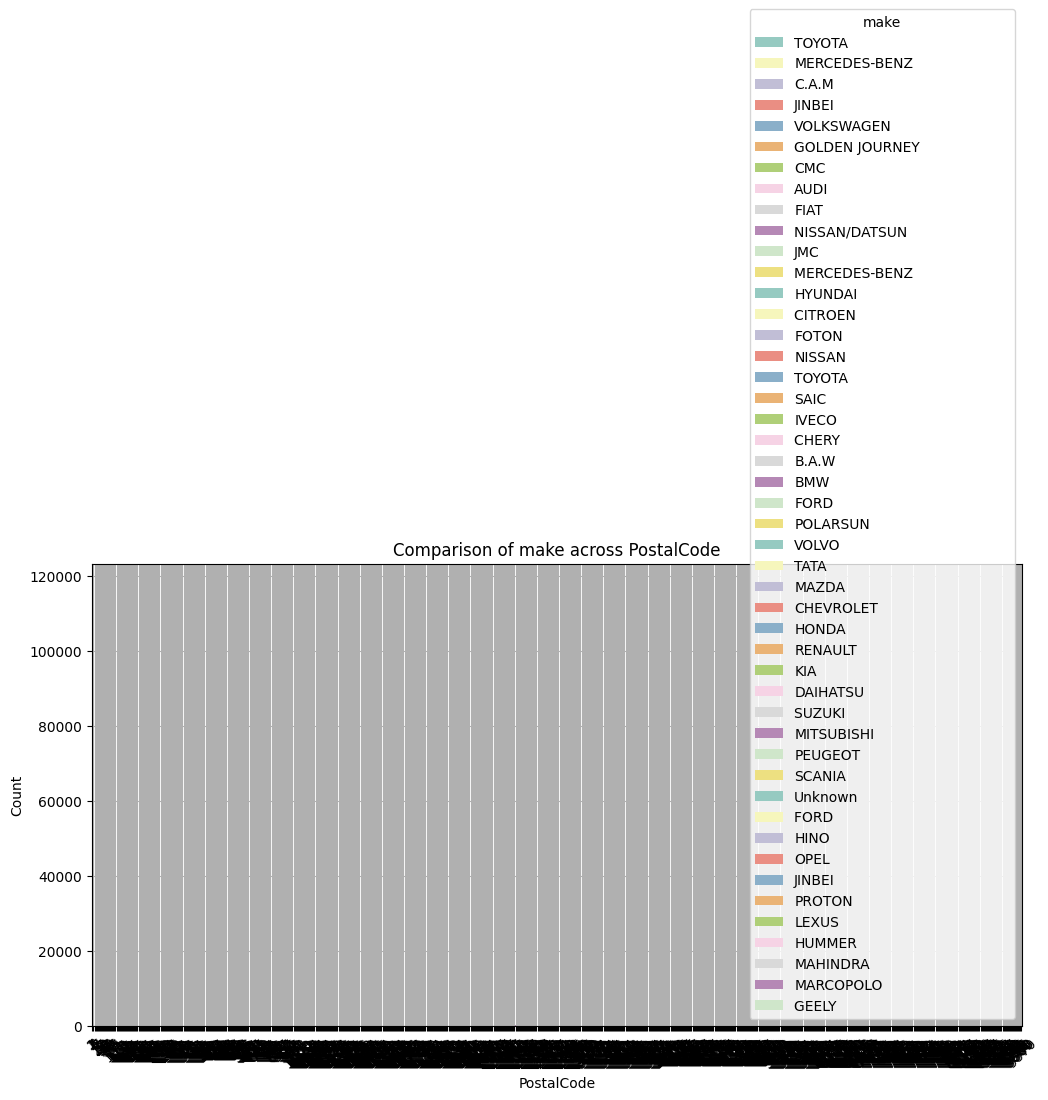

In [14]:
from insurance_analysis import plot_auto_make_trends

# Compare auto make trends across PostalCode
plot_auto_make_trends(data, 'PostalCode', 'make')


c:\Users\Naim\Insurance-comp-anlysis\scripts\insurance_analysis.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="Set3")


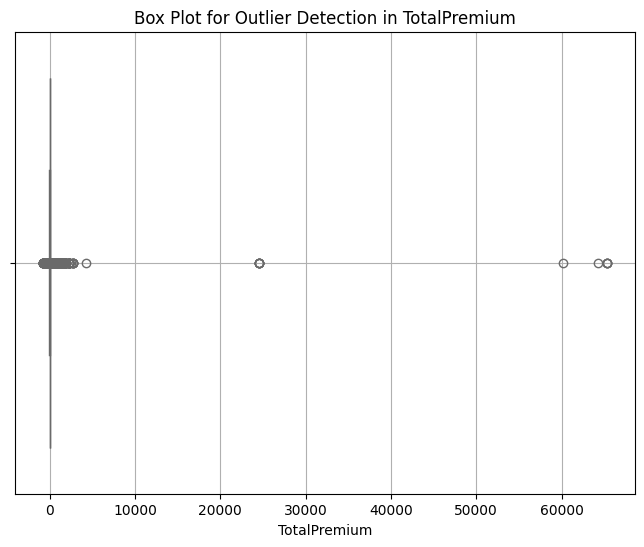

c:\Users\Naim\Insurance-comp-anlysis\scripts\insurance_analysis.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="Set3")


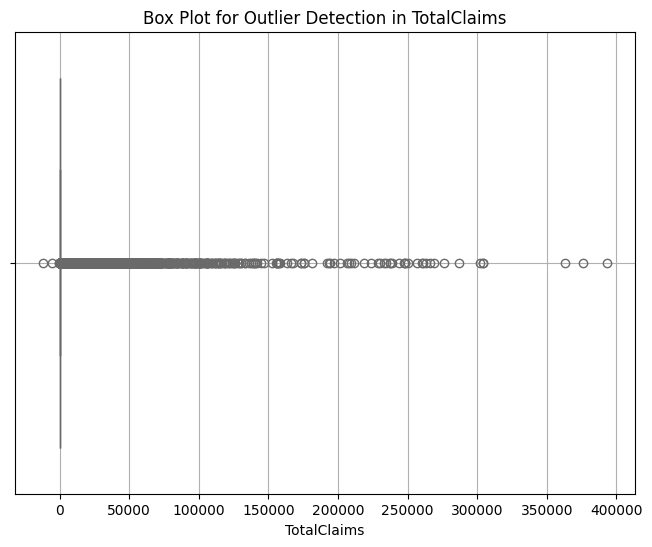

c:\Users\Naim\Insurance-comp-anlysis\scripts\insurance_analysis.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="Set3")


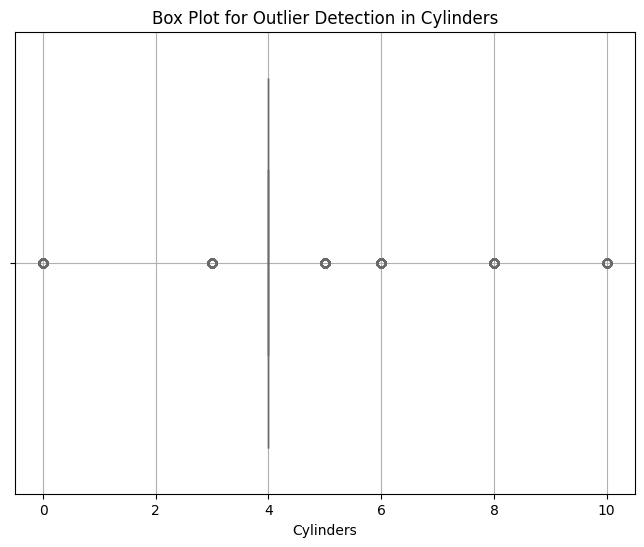

c:\Users\Naim\Insurance-comp-anlysis\scripts\insurance_analysis.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="Set3")


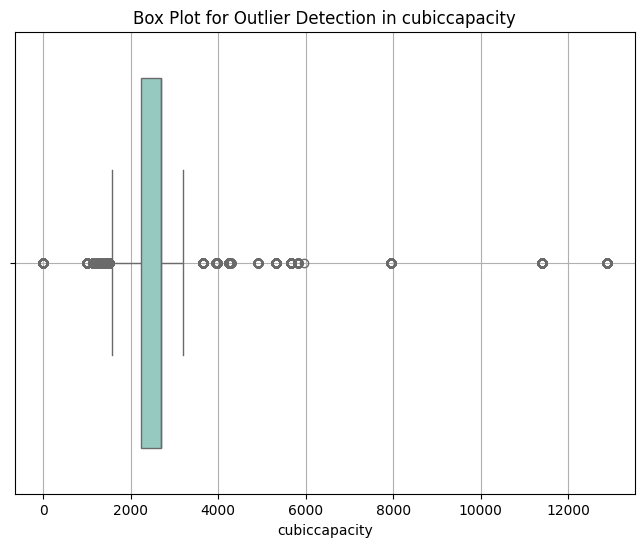

c:\Users\Naim\Insurance-comp-anlysis\scripts\insurance_analysis.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="Set3")


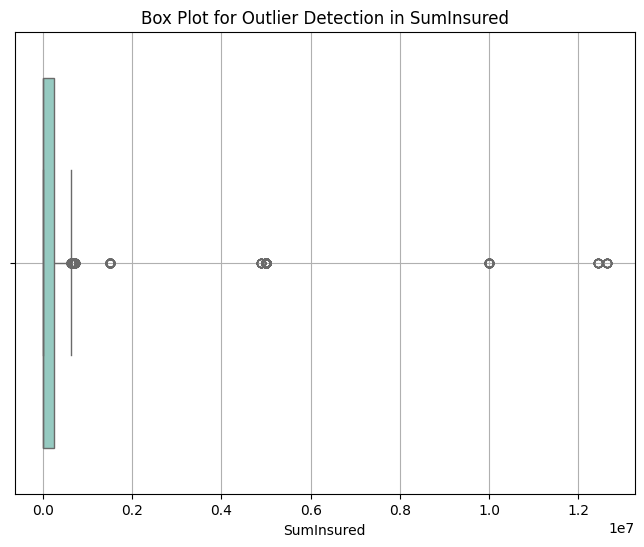

In [15]:

from insurance_analysis import plot_outliers_boxplot

# Define numerical columns to check for outliers
numerical_columns = ['TotalPremium', 'TotalClaims', 'Cylinders', 'cubiccapacity', 'SumInsured']

# Call the function to plot box plots for outlier detection
plot_outliers_boxplot(cleaned_data, numerical_columns)


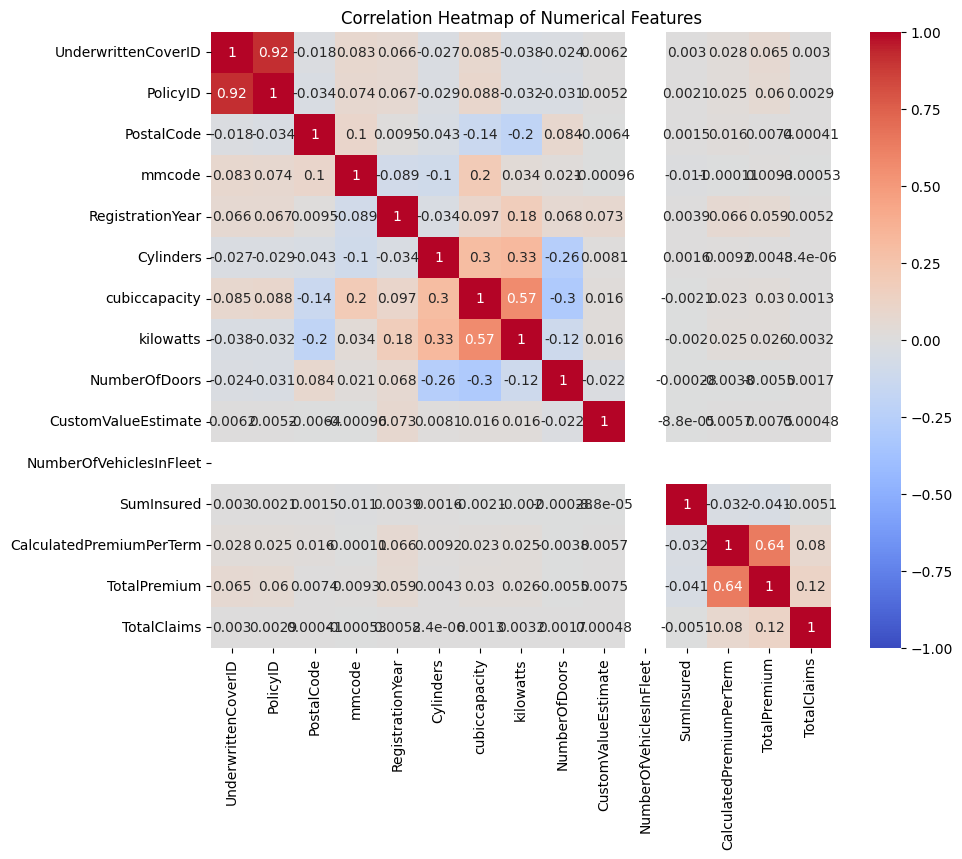

In [16]:
# Call the function with your dataframe
from insurance_analysis import plot_correlation_heatmap


plot_correlation_heatmap(cleaned_data)   

<Figure size 1200x600 with 0 Axes>

c:\Users\Naim\Insurance-comp-anlysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


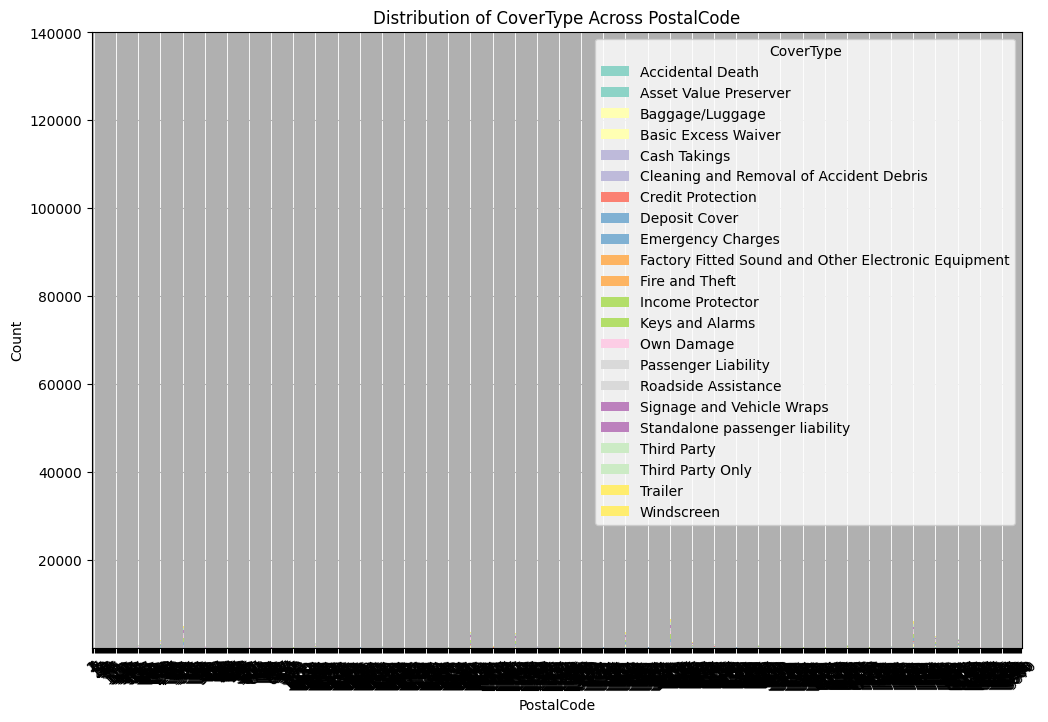

In [17]:
# Call the function with your dataframe
from insurance_analysis import plot_stacked_bar


plot_stacked_bar(cleaned_data, 'PostalCode', 'CoverType')

c:\Users\Naim\Insurance-comp-anlysis\scripts\insurance_analysis.py:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=vehicle_col, y=premium_col, data=df, palette='Set2')


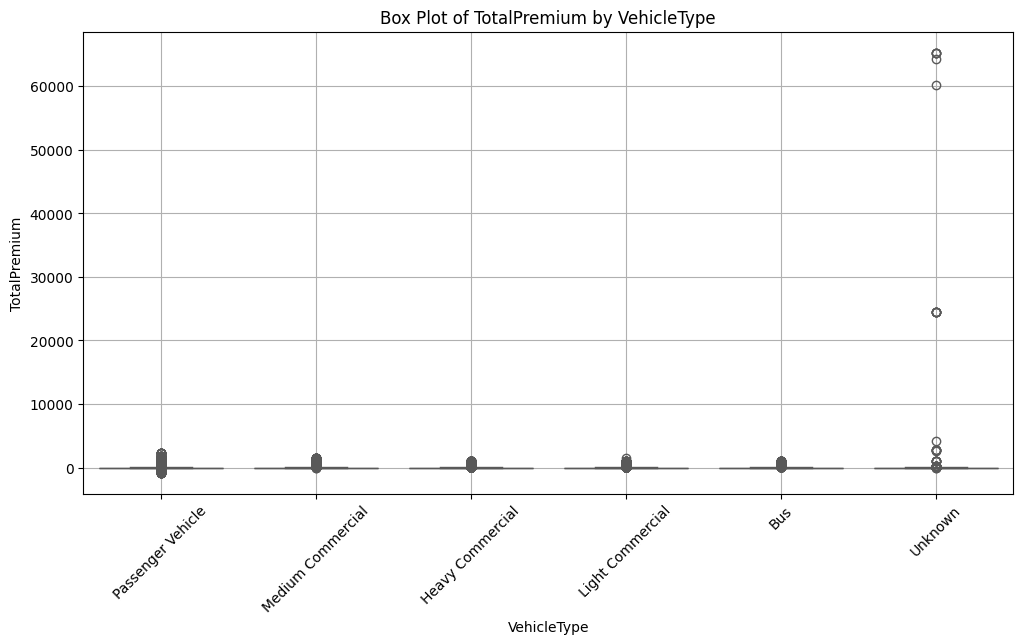

In [18]:
# Call the function with your dataframe
from insurance_analysis import plot_box_premium_by_vehicle


plot_box_premium_by_vehicle(cleaned_data, 'VehicleType', 'TotalPremium')


In [19]:
import numpy as np

# Step 1: Convert TransactionMonth to datetime
cleaned_data['TransactionMonth'] = pd.to_datetime(cleaned_data['TransactionMonth'], errors='coerce')

# Step 2: Check summary statistics for numerical columns
print(cleaned_data[['mmcode', 'Cylinders', 'cubiccapacity']].describe())

# Step 3: Check variance for TotalPremium and TotalClaims
print(cleaned_data[['TotalPremium', 'TotalClaims']].var())

# Step 4: Handle missing values or incorrect entries (optional)
cleaned_data['TotalPremium'] = pd.to_numeric(cleaned_data['TotalPremium'], errors='coerce')
cleaned_data['TotalClaims'] = pd.to_numeric(cleaned_data['TotalClaims'], errors='coerce')

# Replace infinite values with NaN
cleaned_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values in 'TotalPremium' and 'TotalClaims' with the median
cleaned_data['TotalPremium'] = cleaned_data['TotalPremium'].fillna(cleaned_data['TotalPremium'].median())
cleaned_data['TotalClaims'] = cleaned_data['TotalClaims'].fillna(cleaned_data['TotalClaims'].median())



             mmcode     Cylinders  cubiccapacity
count  1.000098e+06  1.000098e+06   1.000098e+06
mean   5.488056e+07  4.046616e+00   2.466869e+03
std    1.360059e+07  2.939410e-01   4.427106e+02
min    4.041200e+06  0.000000e+00   0.000000e+00
25%    6.005692e+07  4.000000e+00   2.237000e+03
50%    6.005842e+07  4.000000e+00   2.694000e+03
75%    6.005842e+07  4.000000e+00   2.694000e+03
max    6.506535e+07  1.000000e+01   1.288000e+04
TotalPremium    5.303096e+04
TotalClaims     5.683812e+06
dtype: float64


In [20]:
# Import the functions from your script
from insurance_analysis import select_kpi, create_ab_groups, t_test, analyze_p_value

# Step 1: Select the KPI (e.g., 'TotalPremium')
kpi_column = 'TotalPremium'
kpi_data = select_kpi(cleaned_data, kpi_column)

# Step 2: Create Group A (Gauteng) and Group B (KwaZulu-Natal) based on 'Province'
group_a, group_b = create_ab_groups(cleaned_data, feature_column='Province', value_a='Gauteng', value_b='KwaZulu-Natal')

# Step 3: Check the size of the groups
print(f"Group A (Gauteng) Size: {len(group_a)}")
print(f"Group B (KwaZulu-Natal) Size: {len(group_b)}")

# Step 4: Perform a t-test to check for a difference in 'TotalPremium' between the provinces
p_value = t_test(group_a, group_b, kpi_column)
print(f"P-value: {p_value}")

# Step 5: Analyze the result
result = analyze_p_value(p_value)
print(result)


Group A (Gauteng) Size: 393865
Group B (KwaZulu-Natal) Size: 169781
P-value: 1.102783357211804e-210
Reject the null hypothesis. There is a statistically significant difference.


In [21]:
# Importing the function from the script
from insurance_analysis import chi_squared_test

# Example: Performing a chi-squared test on Province
group_a, group_b = create_ab_groups(cleaned_data, feature_column='Province', value_a='Gauteng', value_b='KwaZulu-Natal')
print(f"Group A (Gauteng) Size: {len(group_a)}")
print(f"Group B (KwaZulu-Natal) Size: {len(group_b)}")


# Perform the chi-squared test on a categorical feature (e.g., 'RiskCategory')
p_value = chi_squared_test(group_a, group_b, feature_column='CoverType')
print(f"P-value: {p_value}")


# Analyze the result
result = analyze_p_value(p_value)
print(f"Chi-squared test result: {result}")


Group A (Gauteng) Size: 393865
Group B (KwaZulu-Natal) Size: 169781
P-value: 0.4982636148845796
Chi-squared test result: Fail to reject the null hypothesis. There is no statistically significant difference.


In [22]:
from insurance_analysis import select_kpi, create_ab_groups, t_test, analyze_p_value

# Step 1: Select KPI
kpi_column = 'TotalClaims'
kpi_data = select_kpi(cleaned_data, kpi_column)

# Step 2: Create Group A (control group) and Group B (test group) based on province
group_a, group_b = create_ab_groups(data, feature_column='Province', value_a='Gauteng', value_b='KwaZulu-Natal')
print(f"Group A (Gauteng) Size: {len(group_a)}")
print(f"Group B (KwaZulu-Natal) Size: {len(group_b)}")
# Step 3: Perform a t-test to check for a difference in TotalClaims between provinces
p_value = t_test(group_a, group_b, kpi_column)
print(f"P-value: {p_value}")

# Step 4: Analyze the result
result = analyze_p_value(p_value)
print(f"Hypothesis 1 - Risk Differences Across Provinces: {result}")


Group A (Gauteng) Size: 393865
Group B (KwaZulu-Natal) Size: 169781
P-value: 0.21269135333580674
Hypothesis 1 - Risk Differences Across Provinces: Fail to reject the null hypothesis. There is no statistically significant difference.


In [29]:
from insurance_analysis import anova_test_for_postalcode_risk
f_stat, p_value = anova_test_for_postalcode_risk(cleaned_data, 'TotalClaims', 'PostalCode')

# Step 4: Analyze the p-value
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There are significant risk differences between zip codes.")
else:
    print("Fail to reject the null hypothesis: There are no significant risk differences between zip codes.")

F-statistic: 0.9419762214391849
P-value: 0.8906511279164051
Fail to reject the null hypothesis: There are no significant risk differences between zip codes.


In [28]:
from insurance_analysis import anova_test_for_postalcode_margin
cleaned_data['Margin'] = cleaned_data['TotalPremium'] - cleaned_data['TotalClaims']

f_stat, p_value = anova_test_for_postalcode_margin(cleaned_data, 'Margin', 'PostalCode')

# Step 4: Analyze the p-value
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There are significant margin (profit) differences between zip codes.")
else:
    print("Fail to reject the null hypothesis: There are no significant margin (profit) differences between zip codes.")

F-statistic: 0.8707474893589263
P-value: 0.9976859758015036
Fail to reject the null hypothesis: There are no significant margin (profit) differences between zip codes.


In [25]:
from insurance_analysis import t_test_men_women
cleaned_data['TotalClaims'] = pd.to_numeric(cleaned_data['TotalClaims'], errors='coerce')

# Step 2: Group data into male and female
group_male = cleaned_data[cleaned_data['Gender'] == 'Male']
group_female = cleaned_data[cleaned_data['Gender'] == 'Female']
t_stat, p_value = t_test_men_women(group_male, group_female, 'TotalClaims')

# Step 4: Analyze the result
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There are significant risk differences between men and women.")
else:
    print("Fail to reject the null hypothesis: There are no significant risk differences between men and women.")

T-statistic: -0.296353891400699
P-value: 0.7669656471629474
Fail to reject the null hypothesis: There are no significant risk differences between men and women.


In [26]:
# Step 1: Select KPI
kpi_column = 'TotalClaims'
kpi_data = select_kpi(data, kpi_column)

# Step 2: Create Group A (control group) and Group B (test group) based on Gender
group_a, group_b = create_ab_groups(cleaned_data, feature_column='Gender', value_a='Female', value_b='Male')

# Step 3: Perform a t-test to check for a difference in TotalClaims between genders
p_value = t_test(group_a, group_b, kpi_column)

# Step 4: Analyze the result
result = analyze_p_value(p_value)
print(f"Hypothesis 4 - Risk Differences Between Women and Men: {result}")


Hypothesis 4 - Risk Differences Between Women and Men: Fail to reject the null hypothesis. There is no statistically significant difference.
